In [225]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

# 设置字体为 SimHei (黑体)，适合显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号 '-' 显示为方块的问题


# T1

In [226]:
def f1(x):
    return np.cos(x)

def f2(x):
    return 1/(1+25*x**2)

def NewtonInterpolation(x_sample:np.array,y_sample:np.array):
    n = len(x_sample)-1
    
    #因python索引从0开始，a[i]实际上对应a_{i-1}
    N = np.zeros((n,len(x_sample)))#这里的N[i][j]对应N_i(x_j)的值
    a = np.zeros(n)
    
    #先计算第一个值
    a[0] = (y_sample[1]-y_sample[0])/(x_sample[1]-x_sample[0])
    N[0] = y_sample[0]+a[0]*(x_sample-x_sample[0])
    
    #迭代计算出a_i的值
    for i in range(1,np.shape(N)[0]):
            N_part = 1
            for j in range(i+1):
                N_part = N_part*(x_sample-x_sample[j])
            
            a[i] = (y_sample[i+1]-N[i-1][i+1])/(N_part[i+1]) 
            N[i] = N[i-1]+a[i]*N_part
    
    def NewtonInterpolatedFunc(x):
        y = np.ones(len(x))*y_sample[0]
        for i in range(n):
            y_part = 1
            for j in range(i+1):
                y_part = y_part*(x-x_sample[j])
                
            y += a[i]*y_part
            
        return y
    return NewtonInterpolatedFunc

def LargrangeInterpolation(x_sample,y_sample):
    n = len(x_sample)
    #计算各A
    def A(x:np.array,j:int):
        A = 1 
        for i in range(n):
            if i!= j:
                A =A*(x-x_sample[i])/(x_sample[j]-x_sample[i])
            else:
                pass
        return A
    def LargrangeInterpolatedFunc(x):
        y = 0
        for j in range(n):
            y += A(x,j)*y_sample[j]
        return y
    return LargrangeInterpolatedFunc

def CubicSplineInterpolation(x_sample,y_sample):
    n = len(x_sample)
    h = np.diff(x_sample)
    delta_y = np.diff(y_sample)
    # 构造三对角矩阵A和右侧向量b
    A = np.zeros((n, n))
    b = np.zeros(n)

    A[0, 0] = 1  # 自然边界条件 S''(x_0) = 0
    A[-1, -1] = 1  # 自然边界条件 S''(x_n) = 0

    for i in range(1, n-1):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        
        b[i] = 6 * ((delta_y[i]) / h[i] - (delta_y[i-1]) / h[i-1])

    # 求解二阶导数 M
    M = np.linalg.solve(A, b)

    parameter = np.zeros((n-1,4))
    for i in range(n-1):
        parameter[i,0] = y_sample[i]
        parameter[i,1] = delta_y[i]/h[i]-(h[i]/6)*(M[i+1]+2*M[i])
        parameter[i,2] = M[i]/2
        parameter[i,3] = (M[i+1]-M[i])/(6*h[i])
    
    def CubicSplineInterpolatiedFunc(x):
        if isinstance(x, float):
            for i in range(n-1):
                if (x >= x_sample[i]) and (x <= x_sample[i+1]):
                    y = parameter[i,0]+parameter[i,1]*(x-x_sample[i])+parameter[i,2]*(x-x_sample[i])**2+parameter[i,3]*(x-x_sample[i])**3
                return y
        if isinstance(x, np.ndarray):
            y = np.array([])
            for i in range(n-1):
                for x_i in x:
                    if (x_i >= x_sample[i]) and (x_i < x_sample[i+1]): #这样会错过最后一个，因此我们将最后一个单独计算
                        y_i = parameter[i,0]+parameter[i,1]*(x_i-x_sample[i])+parameter[i,2]*(x_i-x_sample[i])**2+parameter[i,3]*(x_i-x_sample[i])**3
                        y = np.append(y,y_i)
            y = y = np.append(y,y_sample[-1])
            return y
                     
        else:
            pass
    return  CubicSplineInterpolatiedFunc


In [227]:
x1 = np.linspace(0,np.pi,10)
x2 = np.linspace(-1,1,10)

y1 = f1(x1)
y2 = f2(x2)

f1_NI = NewtonInterpolation(x1,y1)
f2_NI = NewtonInterpolation(x2,y2)

f1_LI = LargrangeInterpolation(x1,y1)
f2_LI = LargrangeInterpolation(x2,y2)

f1_NI_inv = NewtonInterpolation(np.flip(x1),np.flip(y1))
f2_NI_inv = NewtonInterpolation(np.flip(x2),np.flip(y2))

f1_CSI = CubicSplineInterpolation(x1,y1)
f2_CSI = CubicSplineInterpolation(x2,y2)

In [228]:
x1_plot = np.linspace(0,np.pi,100)
y1_NI = f1_NI(x1_plot)
y1_NI_inv = f1_NI_inv(x1_plot)
y1_LI = f1_LI(x1_plot)
y1_CSI = f1_CSI(x1_plot)
y1_real = f1(x1_plot)

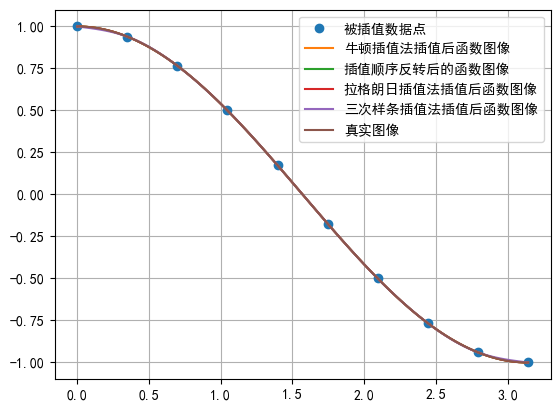

In [229]:
plt.figure()

plt.plot(x1,y1,linestyle ='None',marker = 'o',label = '被插值数据点')
plt.plot(x1_plot,y1_NI,label = '牛顿插值法插值后函数图像')
plt.plot(x1_plot,y1_NI_inv,label = '插值顺序反转后的函数图像')
plt.plot(x1_plot,y1_LI,label = '拉格朗日插值法插值后函数图像')
plt.plot(x1_plot,y1_CSI,label = '三次样条插值法插值后函数图像')
plt.plot(x1_plot,y1_real,label = '真实图像')

plt.grid()
plt.legend()
plt.show()

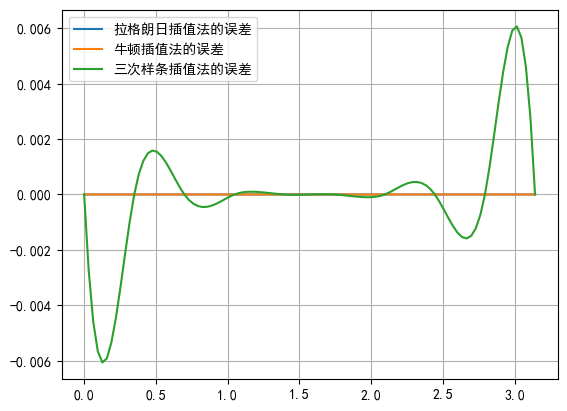

In [230]:
#  画出不同插值点法的误差
plt.figure()

plt.plot(x1_plot,-y1_real+y1_LI,label = "拉格朗日插值法的误差")
plt.plot(x1_plot,-y1_real+y1_NI,label = "牛顿插值法的误差")
plt.plot(x1_plot,-y1_real+y1_CSI,label = "三次样条插值法的误差")


plt.grid()
plt.legend()
plt.show()


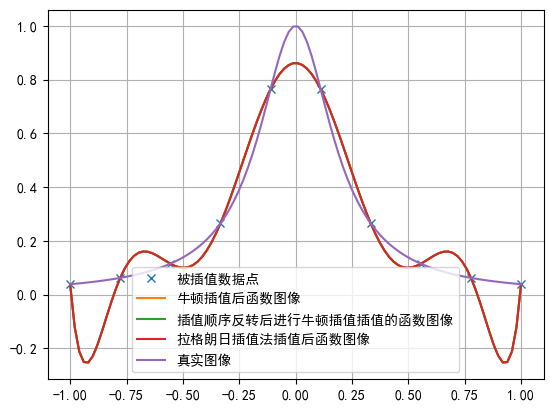

In [231]:
x2_plot = np.linspace(-1,1,100)
y2_NI = f2_NI(x2_plot)
y2_NI_inv = f2_NI_inv(x2_plot)
y2_LI = f2_LI(x2_plot)
y2_real = f2(x2_plot)
plt.figure()

plt.plot(x2,y2,linestyle ='None',marker = 'x',label = '被插值数据点')
plt.plot(x2_plot,y2_NI,label = '牛顿插值后函数图像')
plt.plot(x2_plot,y2_NI_inv,label = '插值顺序反转后进行牛顿插值插值的函数图像')
plt.plot(x2_plot,y2_LI,label = '拉格朗日插值法插值后函数图像')
plt.plot(x2_plot,y2_real,label = '真实图像')

plt.grid()
plt.legend()
plt.show()

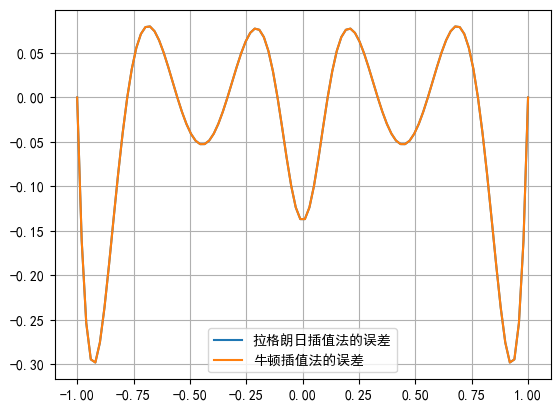

In [232]:
#  画出不同插值点法的误差
plt.figure()

plt.plot(x2_plot,-y2_real+y2_LI,label = "拉格朗日插值法的误差")
plt.plot(x2_plot,-y2_real+y2_NI,label = "牛顿插值法的误差")


plt.grid()
plt.legend()
plt.show()


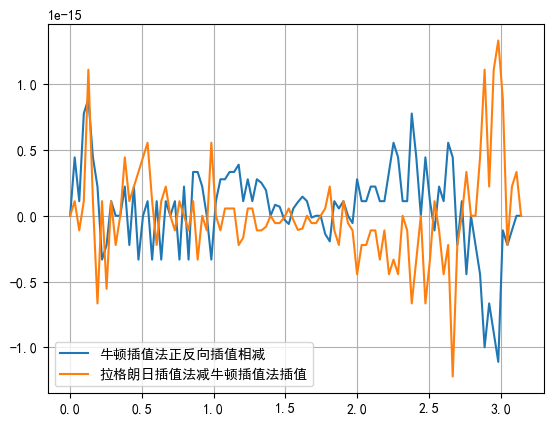

In [244]:
# 牛顿插值法正反插入的区别
plt.figure()

plt.plot(x1_plot,y1_NI-y1_NI_inv,label = "牛顿插值法正反向插值相减")
plt.plot(x1_plot,y1_LI-y1_NI,label = "拉格朗日插值法减牛顿插值法插值")

plt.grid()
plt.legend()
plt.show()

可以发现，插值数量级在e-14,认为插值法之间并无差距，这个数量级的差很可能是计算机精度导致的，实际上，这可以用插值多项式的唯一性来证明

In [234]:
f2_CSI = CubicSplineInterpolation(x2,y2)
y2_CSI = f2_CSI(x2_plot)


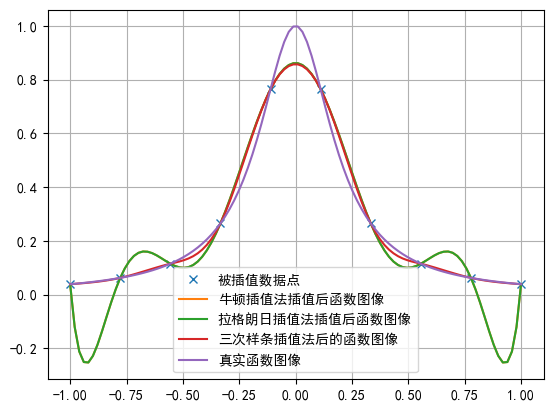

In [242]:
plt.figure()
plt.plot(x2,y2,linestyle ='None',marker = 'x',label = '被插值数据点')
plt.plot(x2_plot,y2_NI,label = '牛顿插值法插值后函数图像')
plt.plot(x2_plot,y2_LI,label = '拉格朗日插值法插值后函数图像')
plt.plot(x2_plot,y2_CSI,label = "三次样条插值法后的函数图像")
plt.plot(x2_plot,y2_real,label = "真实函数图像")

plt.grid()
plt.legend()
plt.show()

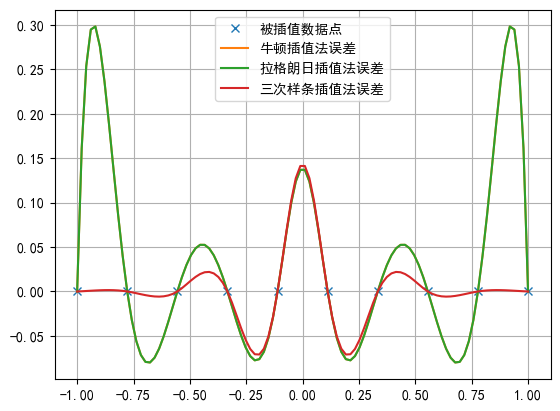

In [243]:
plt.figure()
plt.plot(x2,np.zeros(len(x2)),linestyle ='None',marker = 'x',label = '被插值数据点')
plt.plot(x2_plot,y2_real-y2_NI,label = '牛顿插值法误差')
plt.plot(x2_plot,y2_real-y2_LI,label = '拉格朗日插值法误差')
plt.plot(x2_plot,y2_real-y2_CSI,label = "三次样条插值法误差")

plt.grid()
plt.legend()
plt.show()

# T2

In [237]:
def StraightLineFit(x:np.array,y:np.array):
    n = len(x)
    a = (np.sum(x*y) - n*np.mean(y)*np.mean(x))/(np.sum(x**2)-n*(np.mean(x))**2)
    b = np.mean(y)-a*np.mean(x)
    return a,b

def ParabolicLineFit(x:np.array,y:np.array):
    n = len(x)
    X = np.zeros((n,3))
    for i in range(np.shape(X)[0]):
        for j in range(np.shape(X)[1]):
            X[i][j] = x[i]**[j]
    
    a = np.linalg.inv(X.T@X)@X.T@y
    return a[0],a[1],a[2]
    

In [238]:
x_sample = np.arange(1,10)
y_sample = np.array([14.6,18.5,36.6,30.8,59.2,60.1,62.2,79.4,99.9])

a1,b1 = StraightLineFit(x_sample,y_sample)
a2,b2,c2 = ParabolicLineFit(x_sample,y_sample)

R_squared1 = 1-np.sum((y_sample-(a1*x_sample+b1))**2)/np.sum((y_sample-np.mean(y_sample))**2)
R_squared2 = 1-np.sum((y_sample-(a2+b2*x_sample+c2*x_sample**2))**2)/np.sum((y_sample-np.mean(y_sample))**2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26368\4142000893.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X[i][j] = x[i]**[j]


In [239]:
print("线性拟合得到结果为y={}x+{},R方为{}".format(a1,b1,R_squared1))
print("抛物线拟合得到结果为y={}+{}x+{}x^2，R方为{}".format(a2,b2,c2,R_squared2))

线性拟合得到结果为y=10.073333333333327x+0.8888888888889284,R方为0.9411125465748046
抛物线拟合得到结果为y=8.261904761906393+6.051688311688025x+0.40216450216452726x^2，R方为0.9488127480227583


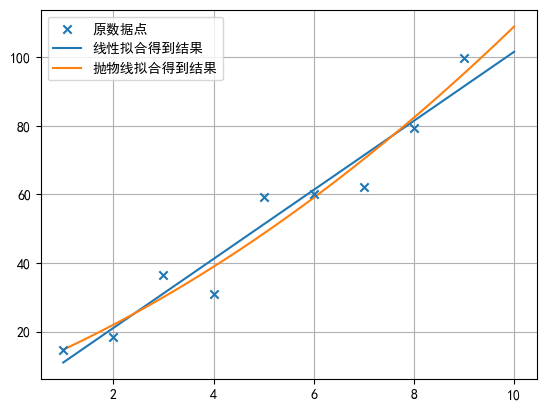

In [240]:
x = np.linspace(1,10,100)
T1 = a1*x+b1
T2 = a2+b2*x+c2*x**2


plt.figure()
plt.scatter(x_sample,y_sample,marker='x', label="原数据点",zorder=5)
plt.plot(x,T1,label = '线性拟合得到结果')
plt.plot(x,T2,label = '抛物线拟合得到结果')


plt.grid()
plt.legend()
plt.show()